In [1]:

import pandas as pd     
import numpy as np      
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns



In [6]:

McReg = pd.read_csv("mergedMc.csv") 
McReg.head(500) 

,StudyNum,Date,ORG.1,Pseudomonas,Specimen,Ciprofloxacin,Ceftazidime,Meropenem,PipTazo,Tob,...,CHRYB,ABCO,EICO,ACURS,HSD,ASPER,MYAB,CALU,HAPAPH,STAN
0,41,01/01/2013,Pseudomona,1,"C,13.0140020.BA",1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,41,01/01/2013,Pseudomona,1,"C,13.0140020.BA",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,02/01/2013,Pseudomona,1,"C,13.0140068.TA",0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,37,02/01/2013,Pseudomona,1,"C,13.0140068.TA",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,02/01/2013,Pseudomona,1,"C,13.0140068.TA",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,240,09/04/2013,Pseudomona,1,"C,13.0143969.AA",1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
496,70,09/04/2013,Pseudomona,1,"C,13.0143966.QA",1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
497,70,09/04/2013,Pseudomona,1,"C,13.0143966.QA",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,13,09/04/2013,Pseudomona,1,"C,13.0144049.QA",1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
McReg = McReg.drop("Date", axis=1)
McReg = McReg.drop("StudyNum", axis=1)


print(McReg.dtypes)


ORG.1            object
Pseudomonas       int64
Specimen         object
Ciprofloxacin     int64
Ceftazidime       int64
                  ...  
ASPER             int64
MYAB              int64
CALU              int64
HAPAPH            int64
STAN              int64
Length: 150, dtype: object


In [8]:
print(McReg.columns)

Index(['ORG.1', 'Pseudomonas', 'Specimen', 'Ciprofloxacin', 'Ceftazidime',
       'Meropenem', 'PipTazo', 'Tob', 'MDR', 'PYOMO',
       ...
       'CHRYB', 'ABCO', 'EICO', 'ACURS', 'HSD', 'ASPER', 'MYAB', 'CALU',
       'HAPAPH', 'STAN'],
      dtype='object', length=150)


In [9]:

X = McReg.drop('MDR', axis=1)
y = McReg['MDR']

ct = make_column_transformer(
    (OneHotEncoder(), ["Specimen", "ORG.1"]),
    remainder="passthrough",
)

X_transformed = ct.fit_transform(X)

print(X_transformed)


  (0, 0)	1.0
  (0, 4427)	1.0
  (0, 4428)	1.0
  (0, 4429)	1.0
  (0, 4430)	1.0
  (0, 4432)	1.0
  (0, 4434)	1.0
  (0, 4437)	1.0
  (0, 4438)	1.0
  (1, 0)	1.0
  (1, 4427)	1.0
  (1, 4428)	1.0
  (1, 4434)	1.0
  (1, 4437)	1.0
  (1, 4438)	1.0
  (2, 2)	1.0
  (2, 4427)	1.0
  (2, 4428)	1.0
  (2, 4430)	1.0
  (2, 4431)	1.0
  (2, 4432)	1.0
  (2, 4434)	1.0
  (2, 4437)	1.0
  (2, 4439)	1.0
  (3, 2)	1.0
  :	:
  (7721, 4435)	1.0
  (7721, 4436)	1.0
  (7721, 4439)	1.0
  (7721, 4450)	1.0
  (7722, 4426)	1.0
  (7722, 4427)	1.0
  (7722, 4428)	1.0
  (7722, 4429)	1.0
  (7722, 4430)	1.0
  (7722, 4431)	1.0
  (7722, 4432)	1.0
  (7722, 4435)	1.0
  (7722, 4436)	1.0
  (7722, 4439)	1.0
  (7722, 4450)	1.0
  (7723, 4424)	1.0
  (7723, 4427)	1.0
  (7723, 4428)	1.0
  (7723, 4429)	1.0
  (7723, 4430)	1.0
  (7723, 4431)	1.0
  (7723, 4432)	1.0
  (7723, 4433)	1.0
  (7723, 4436)	1.0
  (7723, 4437)	1.0


In [10]:
feature_names = ct.transformers_[0][1].get_feature_names_out(['Specimen', 'ORG.1'])
print("Number of feature names:", len(feature_names))
print("Feature names:", feature_names)


Number of feature names: 4428
Feature names: ['Specimen_C,13.0140020.BA' 'Specimen_C,13.0140066.PA'
 'Specimen_C,13.0140068.TA' ... 'Specimen_C,18.0164275.KA'
 'Specimen_C,18.0166334.QA' 'ORG.1_Pseudomona']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [12]:



logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_predlOG = logreg.predict(X_test)

accuracy = logreg.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear', 'saga'],
}

logreg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(logreg, parameters, cv=4, n_jobs=-1, verbose=4)
grid_search.fit(X_train, y_train)

print('Best score for training data:', grid_search.best_score_)
print('Best parameters:', grid_search.best_params_)

best_modelLOG = grid_search.best_estimator_

accuracy = best_modelLOG.score(X_test, y_test)
print('Accuracy on test data:', accuracy)


Fitting 4 folds for each of 32 candidates, totalling 128 fits
Best score for training data: 1.0
Best parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on test data: 1.0


In [14]:
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_predlOG))

labels = ['1', '0']
confusion_mat = cm(y_test, y_predlOG)
sns.heatmap(confusion_mat, xticklabels=labels, yticklabels=labels, annot=True, linewidths=0.1, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix', fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1029
           1       1.00      1.00      1.00       516

    accuracy                           1.00      1545
   macro avg       1.00      1.00      1.00      1545
weighted avg       1.00      1.00      1.00      1545



NameError: name 'cm' is not defined

Accuracy: 1.0

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1029
           1       1.00      1.00      1.00       516

    accuracy                           1.00      1545
   macro avg       1.00      1.00      1.00      1545
weighted avg       1.00      1.00      1.00      1545



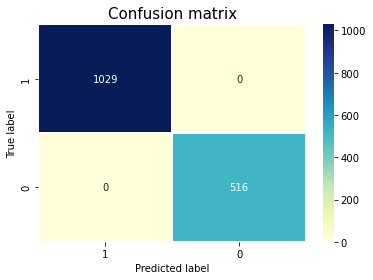

In [15]:
from sklearn.metrics import confusion_matrix as cm

svm_model = SVC(probability=True)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

labels = ['1', '0']
confusion_mat = cm(y_test, y_pred)
sns.heatmap(confusion_mat, xticklabels=labels, yticklabels=labels, annot=True, linewidths=0.1, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix', fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrixSVM.png')  


plt.show()


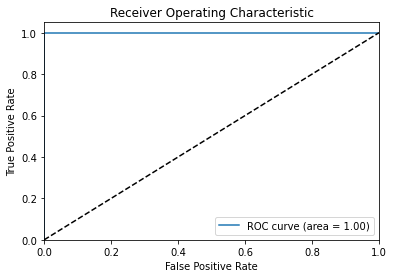

In [16]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curveSVM.png')  
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameters = [
    {'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'verbose': [False]},
    #{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'verbose': [False]},
    #{'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'verbose': [False]},
    {'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001], 'C': [0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'verbose': [False]}
]

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)  

model = GridSearchCV(svm_model, parameters, n_jobs=-1, cv=cv, verbose=4)
model.fit(X_train, y_train)

print('Best score for training data:', model.best_score_,"\n") 

print('Best C:',model.best_estimator_.C,"\n") 
print('Best Kernel:',model.best_estimator_.kernel,"\n")
print('Best Gamma:',model.best_estimator_.gamma,"\n")

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Best score for training data: 1.0 

Best C: 10 

Best Kernel: sigmoid 

Best Gamma: 0.001 



Accuracy: 1.0

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1029
           1       1.00      1.00      1.00       516

    accuracy                           1.00      1545
   macro avg       1.00      1.00      1.00      1545
weighted avg       1.00      1.00      1.00      1545



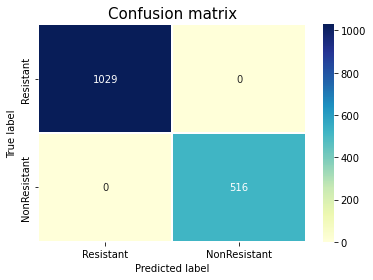

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
final_model = model.best_estimator_
y_pred = final_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))


Y_predBest = final_model.predict(X_test)
labels = ['Resistant', 'NonResistant']
confusion_matrix = confusion_matrix(y_test, Y_predBest)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrixSVM_Grid.png')  

plt.show()

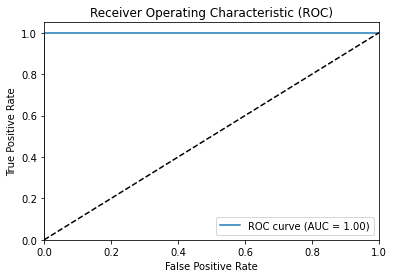

In [19]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = final_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('ROC_CURVE_SVM_Grid.png')  

plt.show()
